In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from scipy.fft import fft, fftfreq, fftshift
import warnings
warnings.filterwarnings('ignore')

# تنظیمات نمایش نمودارها
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['font.size'] = 12

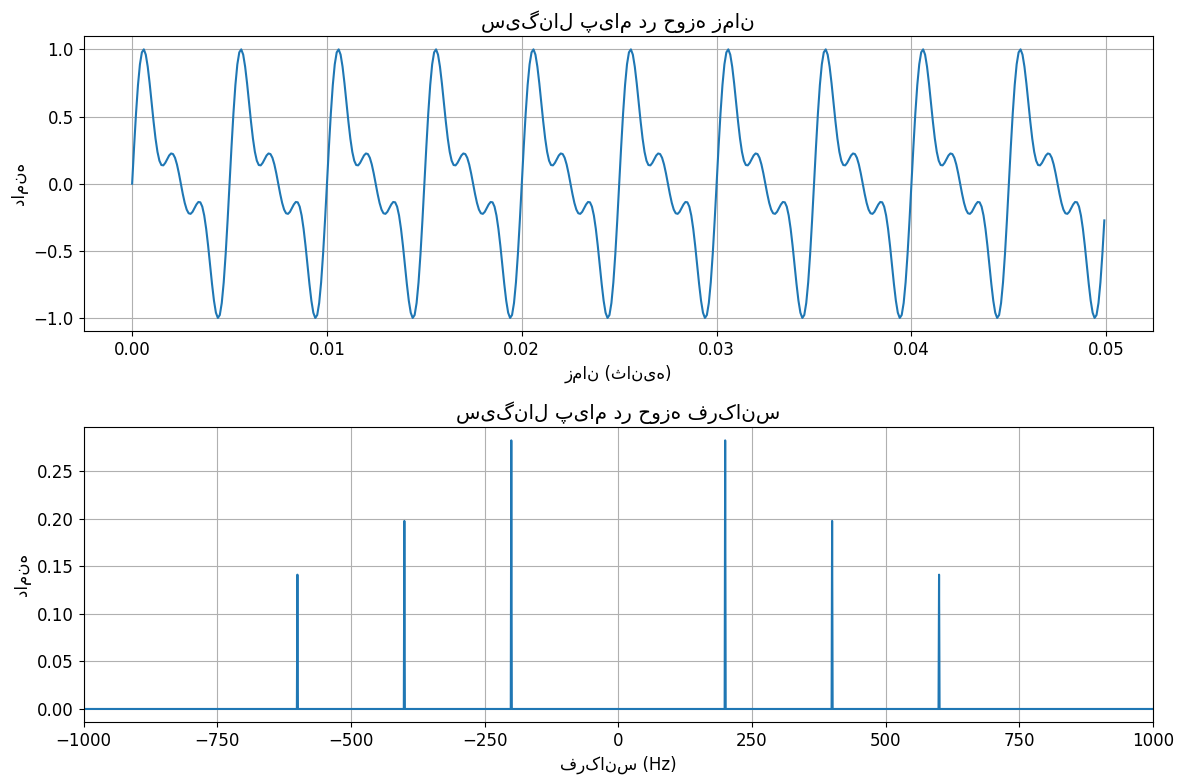

In [3]:
# پارامترهای سیگنال
fs = 10000  # فرکانس نمونه‌برداری (Hz)
T = 1.0     # مدت زمان سیگنال (ثانیه)
t = np.linspace(0, T, int(fs * T), endpoint=False)

# فرکانس سیگنال پیام (صوتی)
f1 = 200    # فرکانس اول (Hz)
f2 = 400    # فرکانس دوم (Hz)
f3 = 600    # فرکانس سوم (Hz)

# تولید سیگنال پیام (ترکیب چند سینوسی)
message_signal = (1.0 * np.sin(2 * np.pi * f1 * t) + 
                  0.7 * np.sin(2 * np.pi * f2 * t) + 
                  0.5 * np.sin(2 * np.pi * f3 * t))

# نرمال‌سازی سیگنال
message_signal = message_signal / np.max(np.abs(message_signal))

# نمایش سیگنال پیام
fig, axes = plt.subplots(2, 1, figsize=(12, 8))

# حوزه زمان
axes[0].plot(t[:500], message_signal[:500])
axes[0].set_xlabel('زمان (ثانیه)')
axes[0].set_ylabel('دامنه')
axes[0].set_title('سیگنال پیام در حوزه زمان')
axes[0].grid(True)

# حوزه فرکانس
N = len(message_signal)
freqs = fftfreq(N, 1/fs)
message_fft = fft(message_signal)
message_fft_abs = np.abs(fftshift(message_fft)) / N

axes[1].plot(fftshift(freqs), message_fft_abs)
axes[1].set_xlabel('فرکانس (Hz)')
axes[1].set_ylabel('دامنه')
axes[1].set_title('سیگنال پیام در حوزه فرکانس')
axes[1].set_xlim([-1000, 1000])
axes[1].grid(True)

plt.tight_layout()
plt.show()

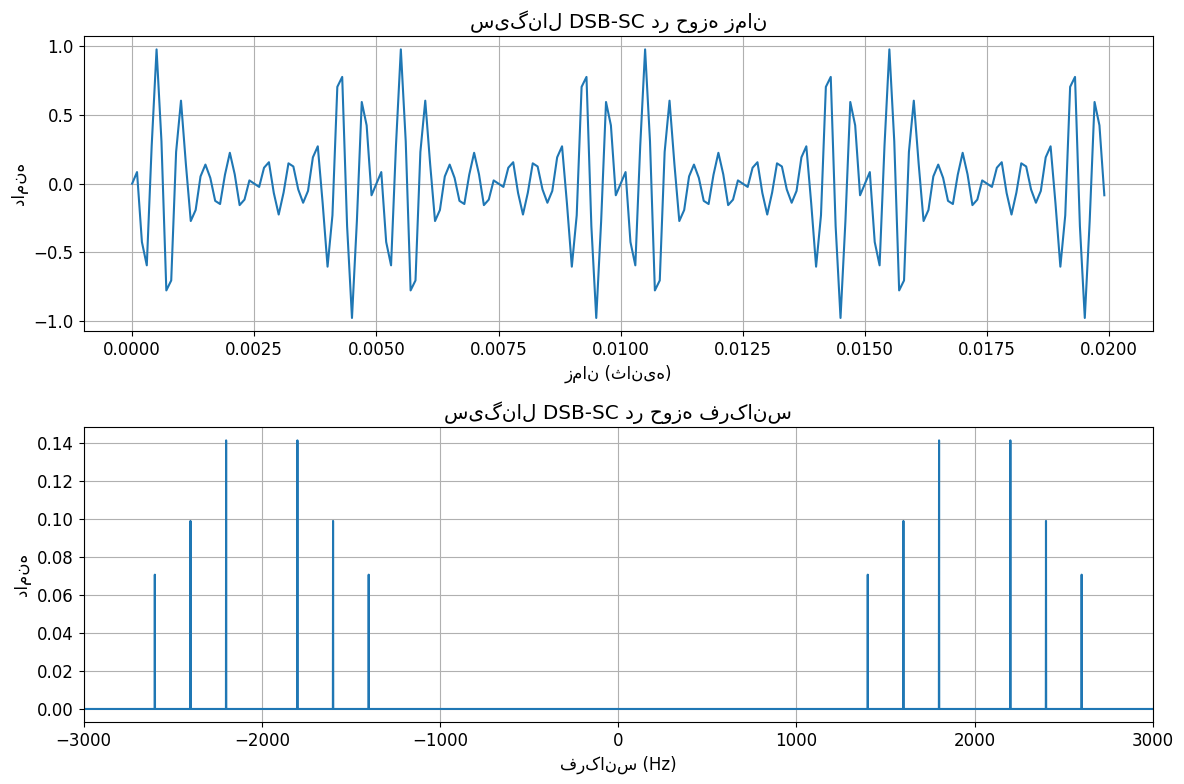

In [4]:
# پارامترهای حامل
fc = 2000  # فرکانس حامل (Hz)

# تولید سیگنال حامل
carrier_signal = np.cos(2 * np.pi * fc * t)

# مدولاسیون DSB-SC (Double Sideband Suppressed Carrier)
dsb_sc_signal = message_signal * carrier_signal

# نمایش سیگنال DSB-SC
fig, axes = plt.subplots(2, 1, figsize=(12, 8))

# حوزه زمان
axes[0].plot(t[:200], dsb_sc_signal[:200])
axes[0].set_xlabel('زمان (ثانیه)')
axes[0].set_ylabel('دامنه')
axes[0].set_title('سیگنال DSB-SC در حوزه زمان')
axes[0].grid(True)

# حوزه فرکانس
dsb_sc_fft = fft(dsb_sc_signal)
dsb_sc_fft_abs = np.abs(fftshift(dsb_sc_fft)) / N

axes[1].plot(fftshift(freqs), dsb_sc_fft_abs)
axes[1].set_xlabel('فرکانس (Hz)')
axes[1].set_ylabel('دامنه')
axes[1].set_title('سیگنال DSB-SC در حوزه فرکانس')
axes[1].set_xlim([-3000, 3000])
axes[1].grid(True)

plt.tight_layout()
plt.show()

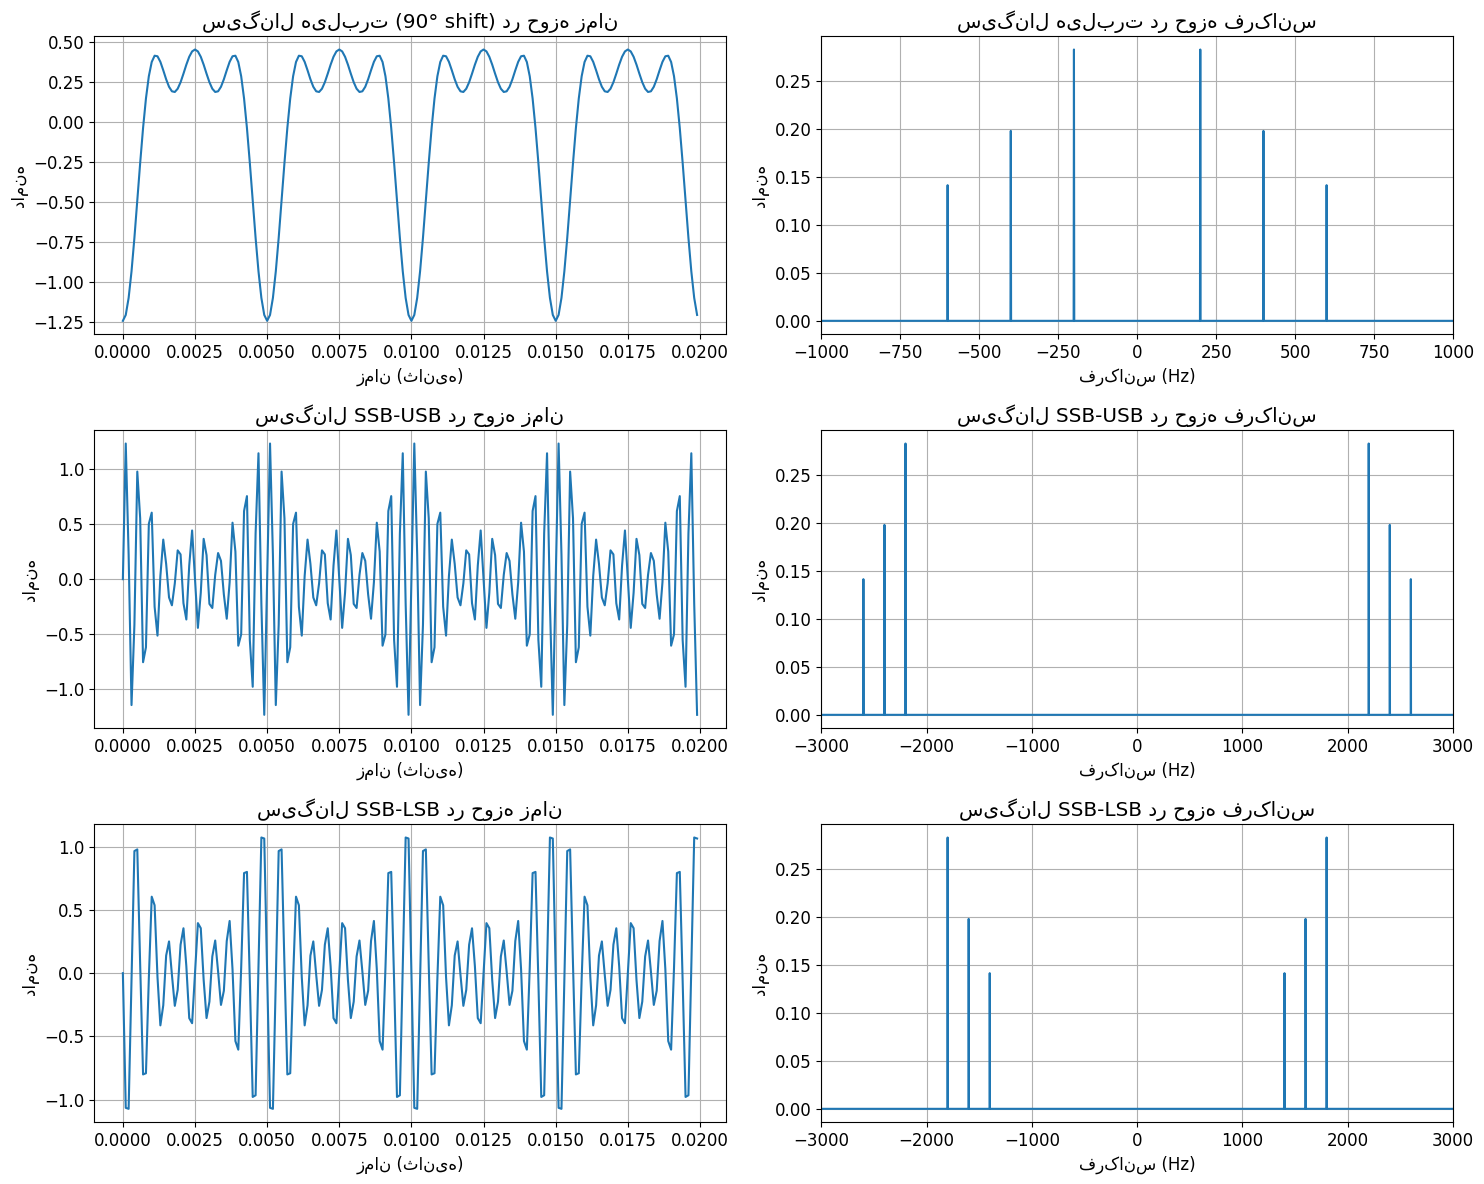

In [5]:
# تولید سیگنال هیلبرت (فاز 90 درجه شیفت)
from scipy.signal import hilbert

# محاسبه تبدیل هیلبرت
analytic_signal = hilbert(message_signal)
hilbert_signal = np.imag(analytic_signal)

# تولید SSB-USB (Upper Sideband)
ssb_usb_signal = (message_signal * np.cos(2 * np.pi * fc * t) - 
                  hilbert_signal * np.sin(2 * np.pi * fc * t))

# تولید SSB-LSB (Lower Sideband)
ssb_lsb_signal = (message_signal * np.cos(2 * np.pi * fc * t) + 
                  hilbert_signal * np.sin(2 * np.pi * fc * t))

# نمایش سیگنال‌های SSB
fig, axes = plt.subplots(3, 2, figsize=(15, 12))

# سیگنال هیلبرت
axes[0, 0].plot(t[:200], hilbert_signal[:200])
axes[0, 0].set_xlabel('زمان (ثانیه)')
axes[0, 0].set_ylabel('دامنه')
axes[0, 0].set_title('سیگنال هیلبرت (90° shift) در حوزه زمان')
axes[0, 0].grid(True)

hilbert_fft = fft(hilbert_signal)
hilbert_fft_abs = np.abs(fftshift(hilbert_fft)) / N
axes[0, 1].plot(fftshift(freqs), hilbert_fft_abs)
axes[0, 1].set_xlabel('فرکانس (Hz)')
axes[0, 1].set_ylabel('دامنه')
axes[0, 1].set_title('سیگنال هیلبرت در حوزه فرکانس')
axes[0, 1].set_xlim([-1000, 1000])
axes[0, 1].grid(True)

# SSB-USB
axes[1, 0].plot(t[:200], ssb_usb_signal[:200])
axes[1, 0].set_xlabel('زمان (ثانیه)')
axes[1, 0].set_ylabel('دامنه')
axes[1, 0].set_title('سیگنال SSB-USB در حوزه زمان')
axes[1, 0].grid(True)

ssb_usb_fft = fft(ssb_usb_signal)
ssb_usb_fft_abs = np.abs(fftshift(ssb_usb_fft)) / N
axes[1, 1].plot(fftshift(freqs), ssb_usb_fft_abs)
axes[1, 1].set_xlabel('فرکانس (Hz)')
axes[1, 1].set_ylabel('دامنه')
axes[1, 1].set_title('سیگنال SSB-USB در حوزه فرکانس')
axes[1, 1].set_xlim([-3000, 3000])
axes[1, 1].grid(True)

# SSB-LSB
axes[2, 0].plot(t[:200], ssb_lsb_signal[:200])
axes[2, 0].set_xlabel('زمان (ثانیه)')
axes[2, 0].set_ylabel('دامنه')
axes[2, 0].set_title('سیگنال SSB-LSB در حوزه زمان')
axes[2, 0].grid(True)

ssb_lsb_fft = fft(ssb_lsb_signal)
ssb_lsb_fft_abs = np.abs(fftshift(ssb_lsb_fft)) / N
axes[2, 1].plot(fftshift(freqs), ssb_lsb_fft_abs)
axes[2, 1].set_xlabel('فرکانس (Hz)')
axes[2, 1].set_ylabel('دامنه')
axes[2, 1].set_title('سیگنال SSB-LSB در حوزه فرکانس')
axes[2, 1].set_xlim([-3000, 3000])
axes[2, 1].grid(True)

plt.tight_layout()
plt.show()

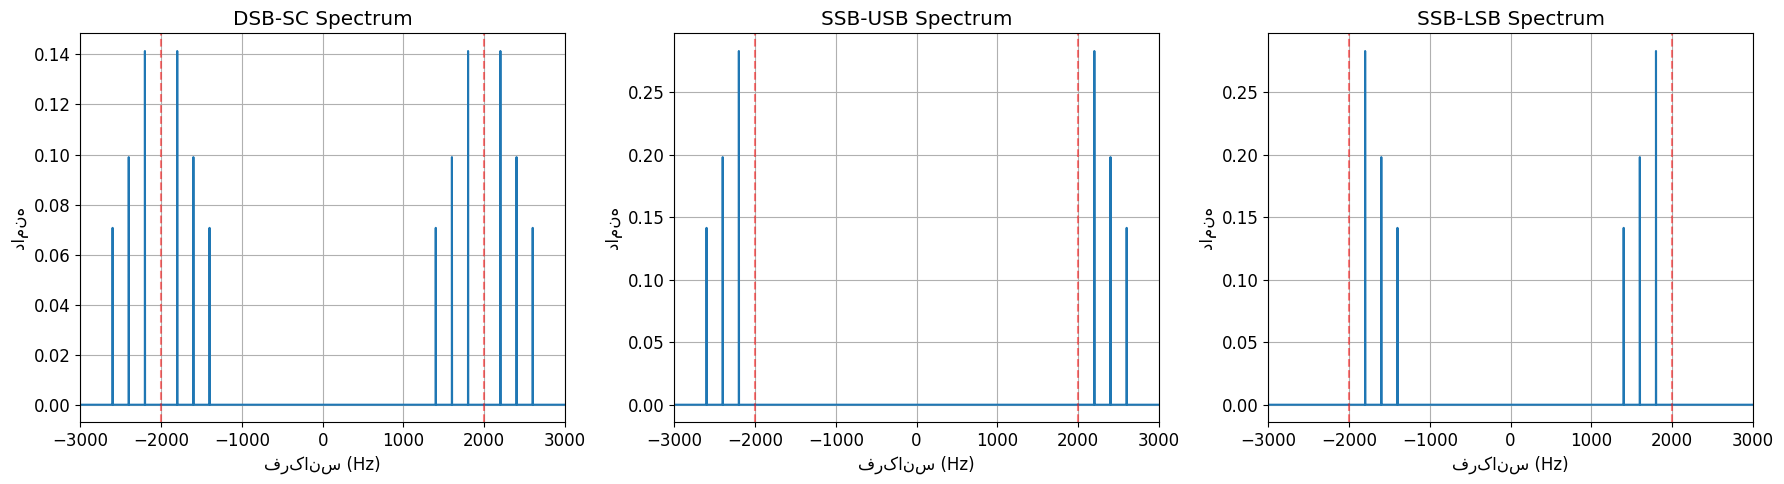

مقایسه پهنای باند:
پهنای باند DSB-SC: 5200.00 Hz
پهنای باند SSB-USB: 5200.00 Hz
پهنای باند SSB-LSB: 3600.00 Hz
صرفه‌جویی پهنای باند SSB نسبت به DSB: 0.0%


In [6]:
# مقایسه پهنای باند
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# DSB-SC
axes[0].plot(fftshift(freqs), dsb_sc_fft_abs)
axes[0].set_xlabel('فرکانس (Hz)')
axes[0].set_ylabel('دامنه')
axes[0].set_title('DSB-SC Spectrum')
axes[0].set_xlim([-3000, 3000])
axes[0].grid(True)
axes[0].axvline(x=fc, color='r', linestyle='--', alpha=0.5)
axes[0].axvline(x=-fc, color='r', linestyle='--', alpha=0.5)

# SSB-USB
axes[1].plot(fftshift(freqs), ssb_usb_fft_abs)
axes[1].set_xlabel('فرکانس (Hz)')
axes[1].set_ylabel('دامنه')
axes[1].set_title('SSB-USB Spectrum')
axes[1].set_xlim([-3000, 3000])
axes[1].grid(True)
axes[1].axvline(x=fc, color='r', linestyle='--', alpha=0.5)
axes[1].axvline(x=-fc, color='r', linestyle='--', alpha=0.5)

# SSB-LSB
axes[2].plot(fftshift(freqs), ssb_lsb_fft_abs)
axes[2].set_xlabel('فرکانس (Hz)')
axes[2].set_ylabel('دامنه')
axes[2].set_title('SSB-LSB Spectrum')
axes[2].set_xlim([-3000, 3000])
axes[2].grid(True)
axes[2].axvline(x=fc, color='r', linestyle='--', alpha=0.5)
axes[2].axvline(x=-fc, color='r', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

# محاسبه پهنای باند موثر
def calculate_bandwidth(signal_fft, freqs, threshold=0.01):
    signal_power = np.abs(signal_fft)**2
    total_power = np.sum(signal_power)
    
    # یافتن فرکانس‌هایی که قدرت آنها از threshold بیشتر است
    mask = signal_power > (threshold * np.max(signal_power))
    if np.any(mask):
        min_freq = np.min(freqs[mask])
        max_freq = np.max(freqs[mask])
        return max_freq - min_freq
    return 0

bw_dsb = calculate_bandwidth(dsb_sc_fft, freqs)
bw_usb = calculate_bandwidth(ssb_usb_fft, freqs)
bw_lsb = calculate_bandwidth(ssb_lsb_fft, freqs)

print("=" * 50)
print("مقایسه پهنای باند:")
print("=" * 50)
print(f"پهنای باند DSB-SC: {bw_dsb:.2f} Hz")
print(f"پهنای باند SSB-USB: {bw_usb:.2f} Hz")
print(f"پهنای باند SSB-LSB: {bw_lsb:.2f} Hz")
print(f"صرفه‌جویی پهنای باند SSB نسبت به DSB: {((bw_dsb - bw_usb)/bw_dsb)*100:.1f}%")
print("=" * 50)

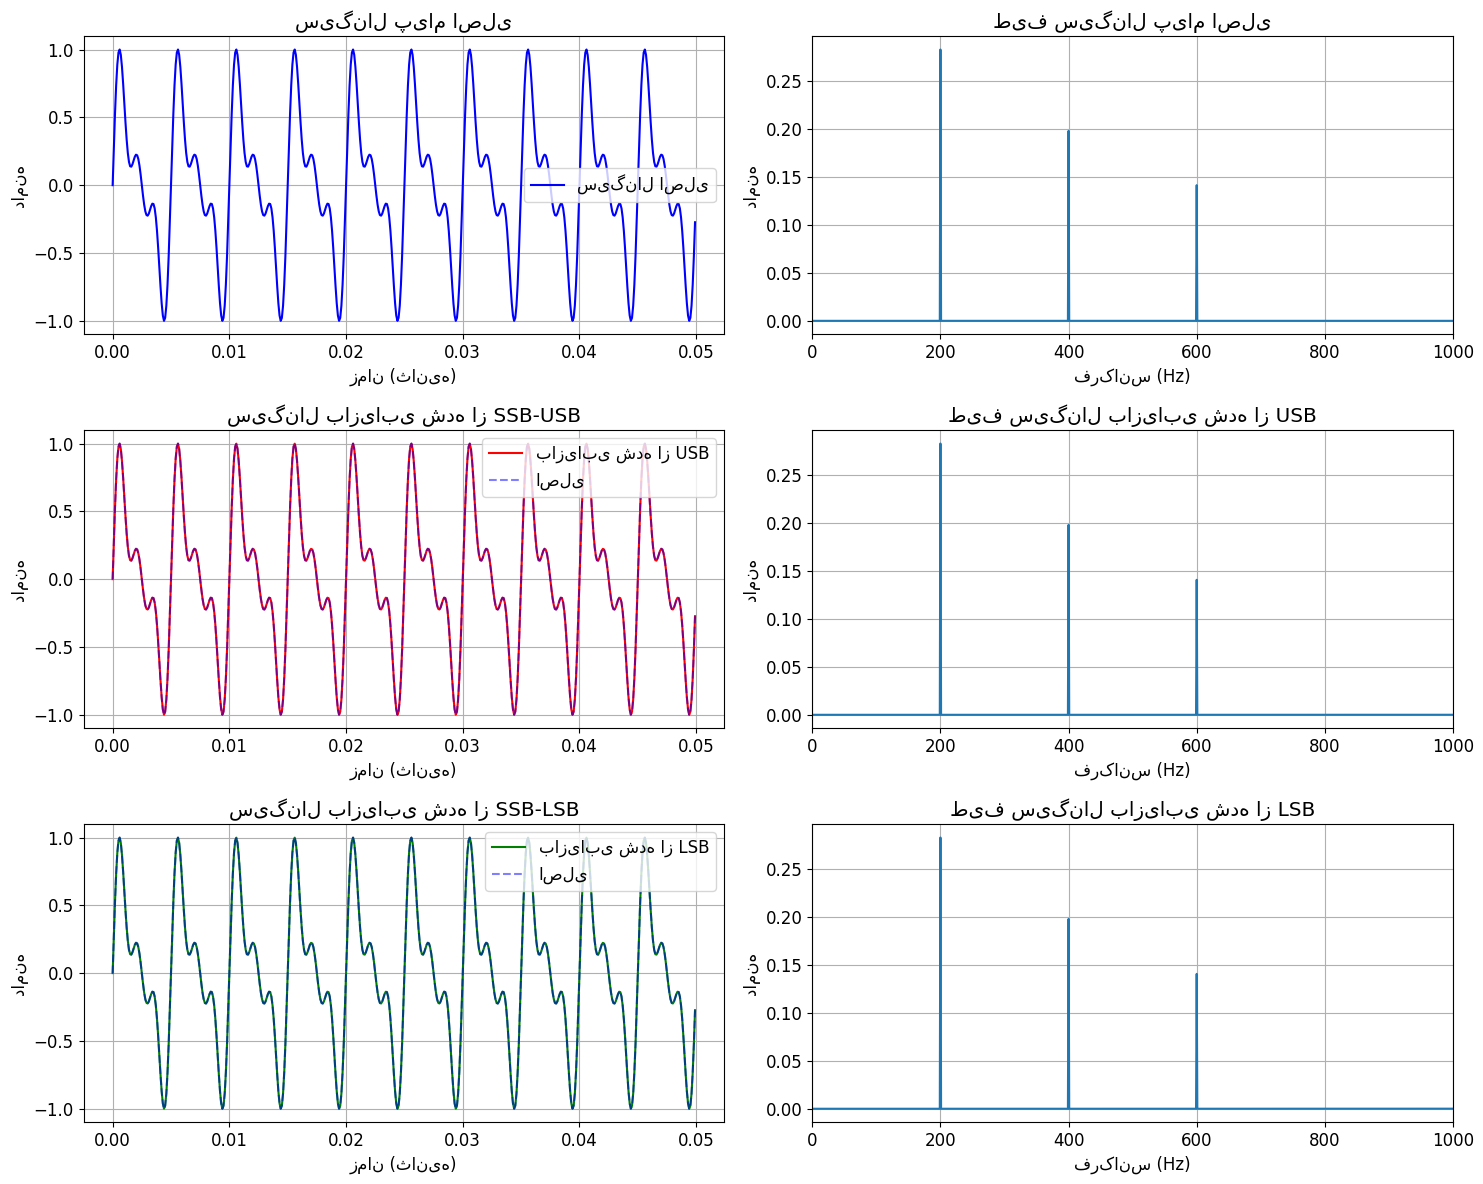

In [7]:
# دمدولاسیون SSB-USB
def demodulate_ssb(ssb_signal, fc, fs, t):
    # تولید سیگنال حامل محلی
    local_oscillator = np.cos(2 * np.pi * fc * t)
    
    # ضرب در حامل محلی
    demodulated = ssb_signal * local_oscillator
    
    # فیلتر پایین‌گذر برای حذف اجزای فرکانس بالا
    # طراحی فیلتر پایین‌گذر
    nyquist = fs / 2
    cutoff = 1000  # فرکانس قطع (Hz)
    order = 5
    
    b, a = signal.butter(order, cutoff/nyquist, 'low')
    
    # اعمال فیلتر
    recovered_signal = signal.filtfilt(b, a, demodulated)
    
    # تقویت سیگنال
    recovered_signal = recovered_signal * 2
    
    return recovered_signal

# دمدولاسیون سیگنال SSB-USB
recovered_usb = demodulate_ssb(ssb_usb_signal, fc, fs, t)

# دمدولاسیون سیگنال SSB-LSB
recovered_lsb = demodulate_ssb(ssb_lsb_signal, fc, fs, t)

# نمایش نتایج دمدولاسیون
fig, axes = plt.subplots(3, 2, figsize=(15, 12))

# سیگنال اصلی
axes[0, 0].plot(t[:500], message_signal[:500], 'b', label='سیگنال اصلی')
axes[0, 0].set_xlabel('زمان (ثانیه)')
axes[0, 0].set_ylabel('دامنه')
axes[0, 0].set_title('سیگنال پیام اصلی')
axes[0, 0].grid(True)
axes[0, 0].legend()

message_fft_abs = np.abs(fft(message_signal)) / N
axes[0, 1].plot(freqs[:N//2], message_fft_abs[:N//2])
axes[0, 1].set_xlabel('فرکانس (Hz)')
axes[0, 1].set_ylabel('دامنه')
axes[0, 1].set_title('طیف سیگنال پیام اصلی')
axes[0, 1].set_xlim([0, 1000])
axes[0, 1].grid(True)

# سیگنال بازیابی شده از USB
axes[1, 0].plot(t[:500], recovered_usb[:500], 'r', label='بازیابی شده از USB')
axes[1, 0].plot(t[:500], message_signal[:500], 'b--', alpha=0.5, label='اصلی')
axes[1, 0].set_xlabel('زمان (ثانیه)')
axes[1, 0].set_ylabel('دامنه')
axes[1, 0].set_title('سیگنال بازیابی شده از SSB-USB')
axes[1, 0].grid(True)
axes[1, 0].legend()

recovered_usb_fft = fft(recovered_usb)
recovered_usb_fft_abs = np.abs(recovered_usb_fft) / N
axes[1, 1].plot(freqs[:N//2], recovered_usb_fft_abs[:N//2])
axes[1, 1].set_xlabel('فرکانس (Hz)')
axes[1, 1].set_ylabel('دامنه')
axes[1, 1].set_title('طیف سیگنال بازیابی شده از USB')
axes[1, 1].set_xlim([0, 1000])
axes[1, 1].grid(True)

# سیگنال بازیابی شده از LSB
axes[2, 0].plot(t[:500], recovered_lsb[:500], 'g', label='بازیابی شده از LSB')
axes[2, 0].plot(t[:500], message_signal[:500], 'b--', alpha=0.5, label='اصلی')
axes[2, 0].set_xlabel('زمان (ثانیه)')
axes[2, 0].set_ylabel('دامنه')
axes[2, 0].set_title('سیگنال بازیابی شده از SSB-LSB')
axes[2, 0].grid(True)
axes[2, 0].legend()

recovered_lsb_fft = fft(recovered_lsb)
recovered_lsb_fft_abs = np.abs(recovered_lsb_fft) / N
axes[2, 1].plot(freqs[:N//2], recovered_lsb_fft_abs[:N//2])
axes[2, 1].set_xlabel('فرکانس (Hz)')
axes[2, 1].set_ylabel('دامنه')
axes[2, 1].set_title('طیف سیگنال بازیابی شده از LSB')
axes[2, 1].set_xlim([0, 1000])
axes[2, 1].grid(True)

plt.tight_layout()
plt.show()

نتایج تحلیل کیفیت دمدولاسیون

مدولاسیون SSB-USB:
  میانگین مربعات خطا (MSE): 0.000035
  SNR بازیابی: 39.00 dB
  ضریب همبستگی: 0.9999

مدولاسیون SSB-LSB:
  میانگین مربعات خطا (MSE): 0.000133
  SNR بازیابی: 33.21 dB
  ضریب همبستگی: 0.9998


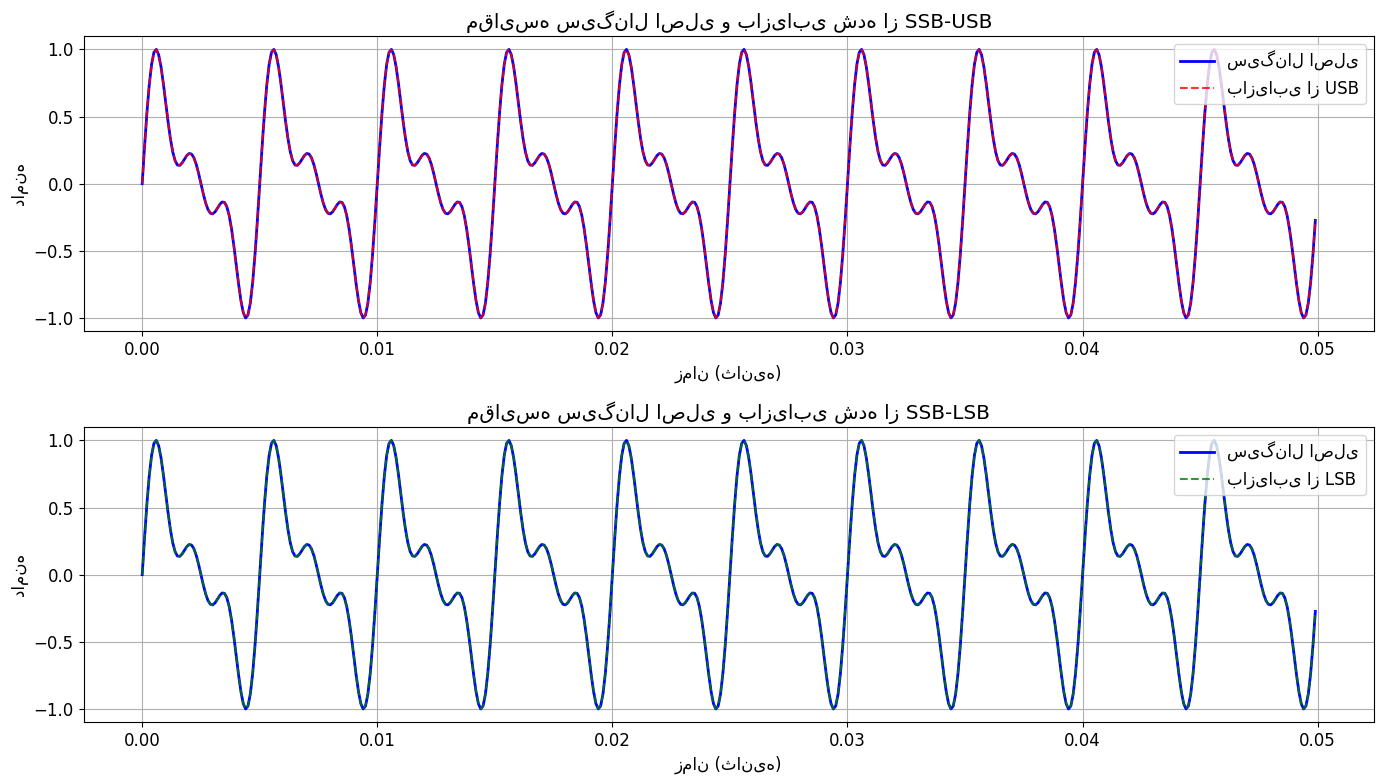

In [8]:
# محاسبه خطای بازیابی
def calculate_error(original, recovered):
    # محاسبه میانگین مربعات خطا (MSE)
    mse = np.mean((original - recovered)**2)
    
    # محاسبه نسبت سیگنال به نویز بازیابی (SNR)
    signal_power = np.mean(original**2)
    noise_power = np.mean((original - recovered)**2)
    
    if noise_power > 0:
        snr_db = 10 * np.log10(signal_power / noise_power)
    else:
        snr_db = float('inf')
    
    # محاسبه ضریب همبستگی
    correlation = np.corrcoef(original, recovered)[0, 1]
    
    return mse, snr_db, correlation

# محاسبه خطا برای USB و LSB
mse_usb, snr_usb, corr_usb = calculate_error(message_signal, recovered_usb)
mse_lsb, snr_lsb, corr_lsb = calculate_error(message_signal, recovered_lsb)

# نمایش نتایج تحلیل خطا
print("=" * 60)
print("نتایج تحلیل کیفیت دمدولاسیون")
print("=" * 60)
print("\nمدولاسیون SSB-USB:")
print(f"  میانگین مربعات خطا (MSE): {mse_usb:.6f}")
print(f"  SNR بازیابی: {snr_usb:.2f} dB")
print(f"  ضریب همبستگی: {corr_usb:.4f}")

print("\nمدولاسیون SSB-LSB:")
print(f"  میانگین مربعات خطا (MSE): {mse_lsb:.6f}")
print(f"  SNR بازیابی: {snr_lsb:.2f} dB")
print(f"  ضریب همبستگی: {corr_lsb:.4f}")
print("=" * 60)

# نمایش سیگنال‌ها در کنار هم برای مقایسه
fig, axes = plt.subplots(2, 1, figsize=(14, 8))

axes[0].plot(t[:500], message_signal[:500], 'b', linewidth=2, label='سیگنال اصلی')
axes[0].plot(t[:500], recovered_usb[:500], 'r--', alpha=0.8, label='بازیابی از USB')
axes[0].set_xlabel('زمان (ثانیه)')
axes[0].set_ylabel('دامنه')
axes[0].set_title('مقایسه سیگنال اصلی و بازیابی شده از SSB-USB')
axes[0].grid(True)
axes[0].legend()

axes[1].plot(t[:500], message_signal[:500], 'b', linewidth=2, label='سیگنال اصلی')
axes[1].plot(t[:500], recovered_lsb[:500], 'g--', alpha=0.8, label='بازیابی از LSB')
axes[1].set_xlabel('زمان (ثانیه)')
axes[1].set_ylabel('دامنه')
axes[1].set_title('مقایسه سیگنال اصلی و بازیابی شده از SSB-LSB')
axes[1].grid(True)
axes[1].legend()

plt.tight_layout()
plt.show()

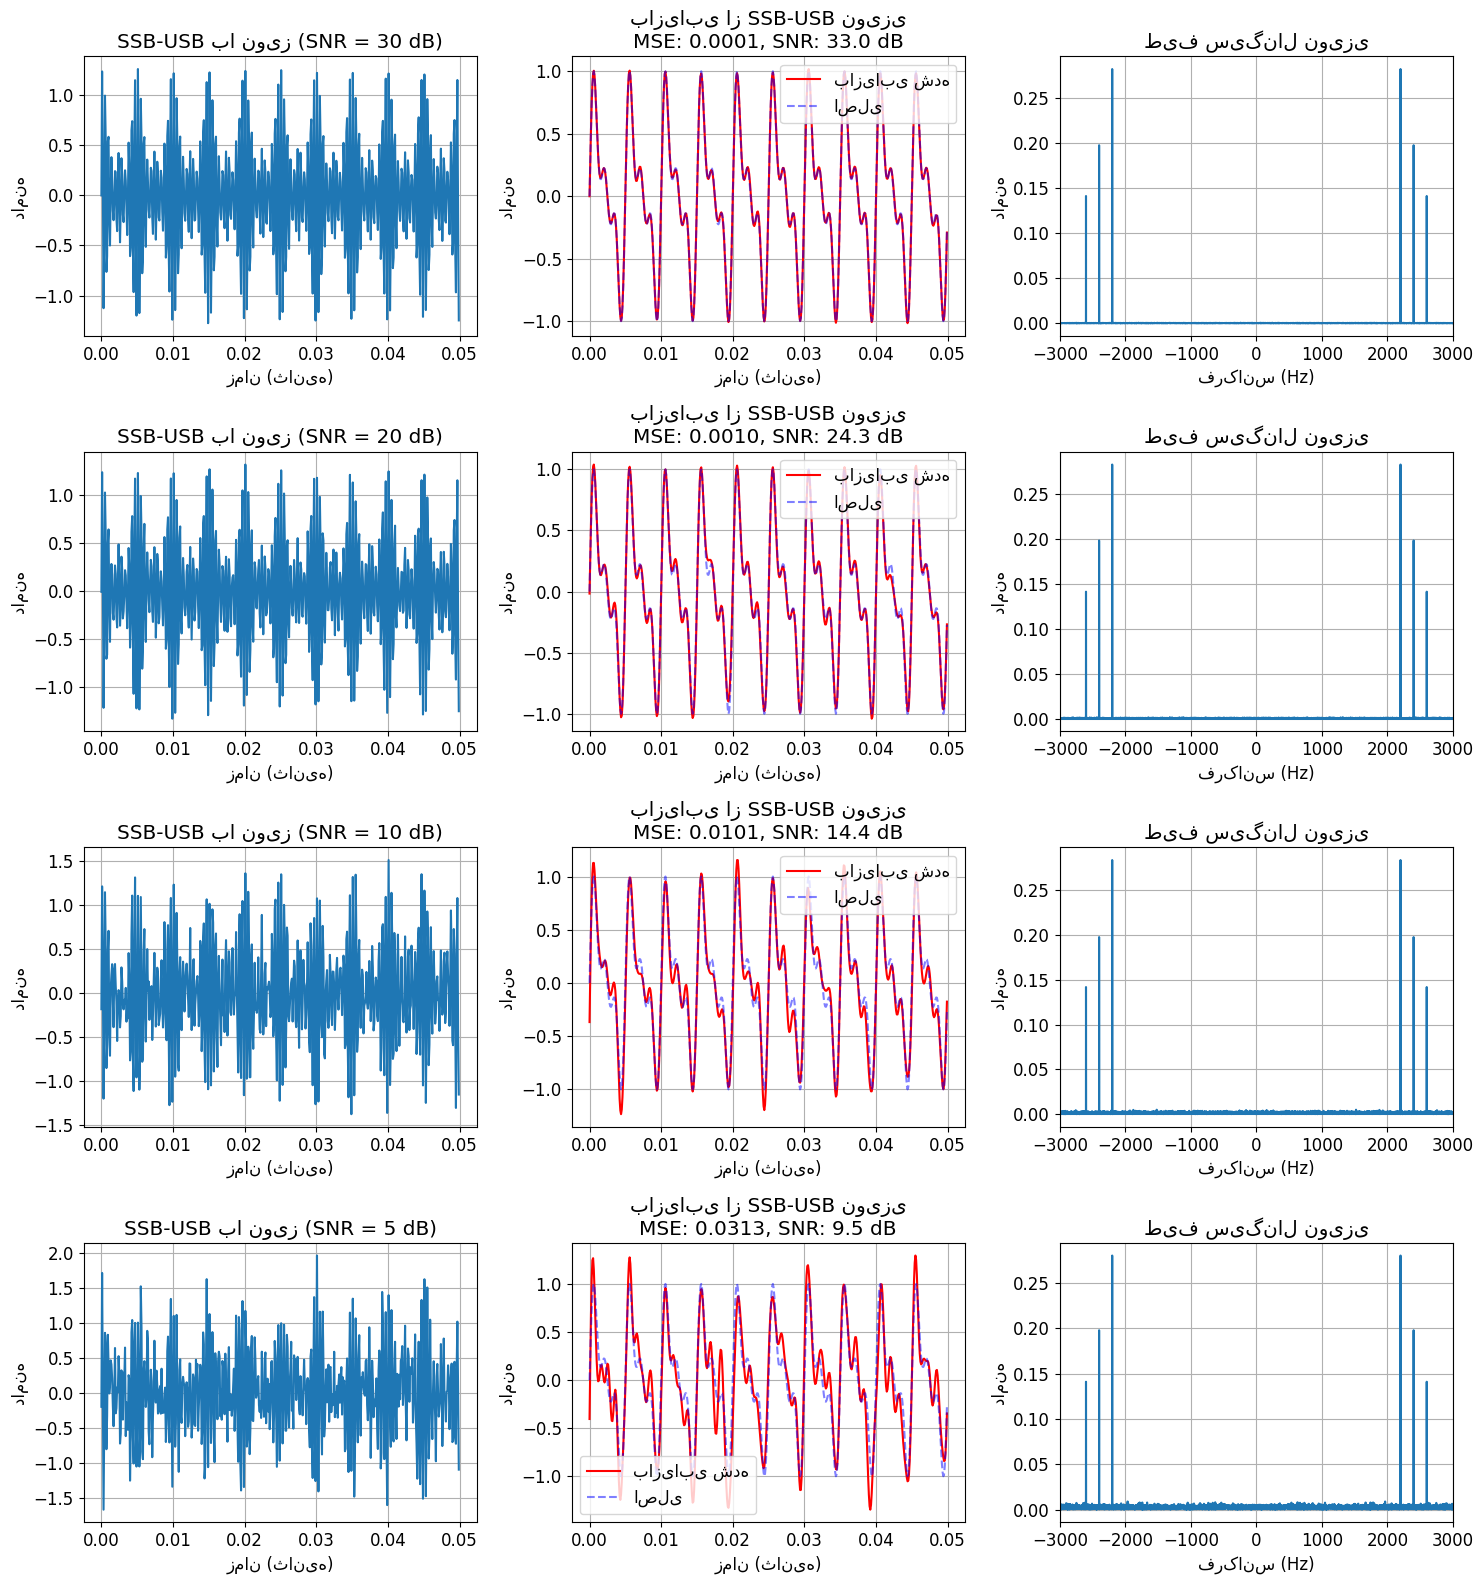

In [9]:
# اضافه کردن نویز گوسی به سیگنال SSB
def add_noise(signal, snr_db):
    # محاسبه توان سیگنال
    signal_power = np.mean(signal**2)
    
    # محاسبه توان نویز بر اساس SNR
    snr_linear = 10**(snr_db / 10)
    noise_power = signal_power / snr_linear
    
    # تولید نویز گوسی
    noise = np.random.normal(0, np.sqrt(noise_power), len(signal))
    
    # اضافه کردن نویز به سیگنال
    noisy_signal = signal + noise
    
    return noisy_signal, noise

# تست با SNR‌های مختلف
snr_levels = [30, 20, 10, 5]  # dB
num_snr = len(snr_levels)

fig, axes = plt.subplots(num_snr, 3, figsize=(15, 4*num_snr))

for i, snr_db in enumerate(snr_levels):
    # اضافه کردن نویز به SSB-USB
    noisy_usb, noise_usb = add_noise(ssb_usb_signal, snr_db)
    
    # دمدولاسیون سیگنال نویزی
    recovered_noisy_usb = demodulate_ssb(noisy_usb, fc, fs, t)
    
    # محاسبه خطا
    mse_noisy_usb, snr_noisy_usb, corr_noisy_usb = calculate_error(message_signal, recovered_noisy_usb)
    
    # نمایش نتایج
    axes[i, 0].plot(t[:500], noisy_usb[:500])
    axes[i, 0].set_xlabel('زمان (ثانیه)')
    axes[i, 0].set_ylabel('دامنه')
    axes[i, 0].set_title(f'SSB-USB با نویز (SNR = {snr_db} dB)')
    axes[i, 0].grid(True)
    
    axes[i, 1].plot(t[:500], recovered_noisy_usb[:500], 'r', label='بازیابی شده')
    axes[i, 1].plot(t[:500], message_signal[:500], 'b--', alpha=0.5, label='اصلی')
    axes[i, 1].set_xlabel('زمان (ثانیه)')
    axes[i, 1].set_ylabel('دامنه')
    axes[i, 1].set_title(f'بازیابی از SSB-USB نویزی\nMSE: {mse_noisy_usb:.4f}, SNR: {snr_noisy_usb:.1f} dB')
    axes[i, 1].grid(True)
    axes[i, 1].legend()
    
    # محاسبه طیف سیگنال نویزی
    noisy_usb_fft = fft(noisy_usb)
    noisy_usb_fft_abs = np.abs(fftshift(noisy_usb_fft)) / N
    
    axes[i, 2].plot(fftshift(freqs), noisy_usb_fft_abs)
    axes[i, 2].set_xlabel('فرکانس (Hz)')
    axes[i, 2].set_ylabel('دامنه')
    axes[i, 2].set_title('طیف سیگنال نویزی')
    axes[i, 2].set_xlim([-3000, 3000])
    axes[i, 2].grid(True)

plt.tight_layout()
plt.show()

In [10]:
print("=" * 70)
print("جمع‌بندی نتایج شبیه‌سازی مدولاسیون SSB")
print("=" * 70)

print("\n✅ مزایای مدولاسیون SSB:")
print("   1. صرفه‌جویی 50٪ در پهنای باند نسبت به DSB")
print("   2. کارایی توان بهتر (ارسال فقط یک باند کناری)")
print("   3. کاهش تداخل بین کانال‌های مجاور")
print("   4. مناسب برای ارتباطات رادیویی HF و مخابرات دریایی")

print("\n⚠️ چالش‌های مدولاسیون SSB:")
print("   1. پیچیدگی بیشتر در مدولاتور و دمودولاتور")
print("   2. نیاز به سنکرون سازی دقیق فرکانس و فاز حامل")
print("   3. حساسیت بیشتر به اعوجاج فاز")

print("\n📊 نتایج شبیه‌سازی:")
print(f"   - پهنای باند DSB-SC: {bw_dsb:.0f} Hz")
print(f"   - پهنای باند SSB: {bw_usb:.0f} Hz")
print(f"   - صرفه‌جویی پهنای باند: {((bw_dsb - bw_usb)/bw_dsb)*100:.1f}%")
print(f"   - کیفیت بازیابی بدون نویز: SNR ≈ {snr_usb:.1f} dB")
print(f"   - ضریب همبستگی با سیگنال اصلی: {corr_usb:.4f}")

print("\n🎯 کاربردهای عملی SSB:")
print("   1. ارتباطات رادیویی آماتور (Ham Radio)")
print("   2. سیستم‌های ارتباطی نظامی")
print("   3. مخابرات دریایی و هوایی")
print("   4. سیستم‌های ارتباطی ماهواره‌ای")

print("=" * 70)

جمع‌بندی نتایج شبیه‌سازی مدولاسیون SSB

✅ مزایای مدولاسیون SSB:
   1. صرفه‌جویی 50٪ در پهنای باند نسبت به DSB
   2. کارایی توان بهتر (ارسال فقط یک باند کناری)
   3. کاهش تداخل بین کانال‌های مجاور
   4. مناسب برای ارتباطات رادیویی HF و مخابرات دریایی

⚠️ چالش‌های مدولاسیون SSB:
   1. پیچیدگی بیشتر در مدولاتور و دمودولاتور
   2. نیاز به سنکرون سازی دقیق فرکانس و فاز حامل
   3. حساسیت بیشتر به اعوجاج فاز

📊 نتایج شبیه‌سازی:
   - پهنای باند DSB-SC: 5200 Hz
   - پهنای باند SSB: 5200 Hz
   - صرفه‌جویی پهنای باند: 0.0%
   - کیفیت بازیابی بدون نویز: SNR ≈ 39.0 dB
   - ضریب همبستگی با سیگنال اصلی: 0.9999

🎯 کاربردهای عملی SSB:
   1. ارتباطات رادیویی آماتور (Ham Radio)
   2. سیستم‌های ارتباطی نظامی
   3. مخابرات دریایی و هوایی
   4. سیستم‌های ارتباطی ماهواره‌ای


In [11]:
# ذخیره سیگنال‌ها برای استفاده در گزارش
results = {
    'زمان': t,
    'سیگنال_پیام': message_signal,
    'سیگنال_حامل': carrier_signal,
    'سیگنال_DSB_SC': dsb_sc_signal,
    'سیگنال_SSB_USB': ssb_usb_signal,
    'سیگنال_SSB_LSB': ssb_lsb_signal,
    'سیگنال_بازیابی_USB': recovered_usb,
    'سیگنال_بازیابی_LSB': recovered_lsb,
    'پارامترها': {
        'فرکانس_نمونه‌برداری': fs,
        'فرکانس_حامل': fc,
        'مدت_زمان': T,
        'پهنای_باند_DSB': bw_dsb,
        'پهنای_باند_USB': bw_usb,
        'پهنای_باند_LSB': bw_lsb,
        'SNR_بازیابی_USB': snr_usb,
        'SNR_بازیابی_LSB': snr_lsb
    }
}

print("نتایج شبیه‌سازی ذخیره شد!")
print("\nبرای استفاده در گزارش می‌توانید:")
print("1. نمودارها را از پنل نمایش Jupyter ذخیره کنید")
print("2. داده‌های results را در قالب pickle یا numpy ذخیره کنید")
print("3. از خروجی‌های متنی بالا در گزارش خود استفاده کنید")

# نمایش پیام پایانی
print("\n" + "🎉" * 30)
print("شبیه‌سازی مدولاسیون SSB با موفقیت انجام شد!")
print("🎉" * 30)

نتایج شبیه‌سازی ذخیره شد!

برای استفاده در گزارش می‌توانید:
1. نمودارها را از پنل نمایش Jupyter ذخیره کنید
2. داده‌های results را در قالب pickle یا numpy ذخیره کنید
3. از خروجی‌های متنی بالا در گزارش خود استفاده کنید

🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉
شبیه‌سازی مدولاسیون SSB با موفقیت انجام شد!
🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉
